# WINE DATASET(UCL REPOSITORY)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

link to dataset: https://archive.ics.uci.edu/ml/datasets/wine

In [2]:
data=pd.read_csv('wine_data.csv',names=["Type","Alcohol",
"Malic acid", 
"Ash",
"Alcalinity of ash",
"Magnesium",
"Total phenols",
"Flavanoids",
"Nonflavanoid phenols",
"Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"])
data.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<h3>Steps to be followed</h3>
<pre>
1.understand data
    Meaning of features
    importance of each
2.Make assumptions based on understanding
    Trying to check assumptions using visualization
    making few more assumptions and making decision about features
3.Modelling data
</pre>

In [3]:
data.describe()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
data.columns

Index(['Type', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

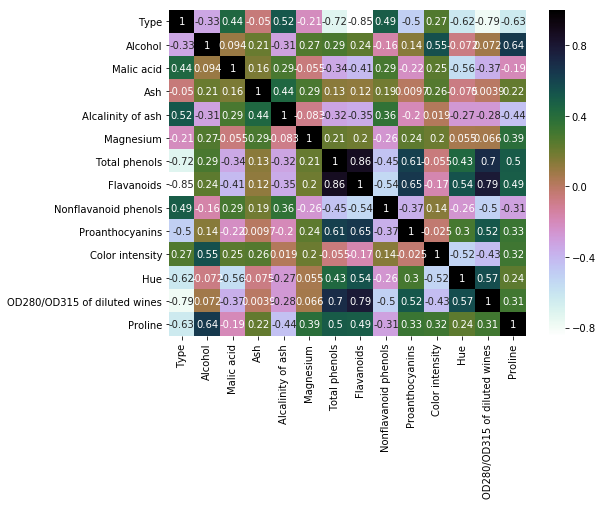

In [5]:
plt.figure(figsize=(8,6)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

x=data[[ 'Alcohol', 'Malic acid',  'Alcalinity of ash',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
        'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline']]
y=data['Type']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=44)
print("training data set:",x_train.shape)
print("testing data set:",x_test.shape)

training data set: (119, 10)
testing data set: (59, 10)


In [7]:
results=pd.DataFrame(columns=['Classifier','r2score','MSE'])
results.head()

,Classifier,r2score,MSE


In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0,C=1.0, solver='lbfgs',multi_class='multinomial')
lr.fit(x_train, y_train)
yhat=lr.predict(x_test)
r2score=r2_score(yhat,y_test)
mse=mean_squared_error(yhat,y_test)
print("r2score",r2score)
print('Mean squared error:',mse)
results=results.append(pd.Series(['Logistic Regression',r2score,mse],index=results.columns ),ignore_index=True) 
print("score:",lr.score(x_train, y_train))


r2score 0.9447047797563262
Mean squared error: 0.03389830508474576
score: 0.9495798319327731


C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [9]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(x_train,y_train)
yhat=lm.predict(x_test)
r2score=r2_score(yhat,y_test)
mse=mean_squared_error(yhat,y_test)
print("r2score",r2score)
print('Mean squared error:',mse)
results=results.append(pd.Series(['Regression',r2score,mse],index=results.columns ),ignore_index=True) 

r2score 0.907843271302634
Mean squared error: 0.048823160144306516


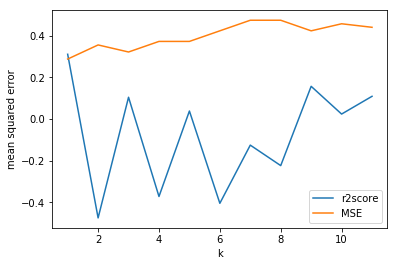

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

x1axes,x2axes=[],[]

for i in range(1,12):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    x1axes.append(r2_score(yhat,y_test))
    x2axes.append(mean_squared_error(yhat,y_test))

plt.plot(list(range(1,12)),x1axes,label="r2score")
plt.plot(list(range(1,12)),x2axes,label="MSE")
plt.xlabel('k')
plt.ylabel('mean squared error')
plt.legend()
plt.show()

In [11]:
results=results.append(pd.Series(['K nearest neighbours',max(x1axes),min(x2axes)],index=results.columns ),ignore_index=True) 

In [12]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
yhat=clf.predict(x_test)
r2score=r2_score(yhat,y_test)
mse=mean_squared_error(yhat,y_test)
print("r2score",r2score)
print('Mean squared error:',mse)
print("cross val score:",cross_val_score(clf, x_train, y_train, cv=10).mean())
results=results.append(pd.Series(['Decision Tree',r2score,mse],index=results.columns ),ignore_index=True) 

r2score 0.8894095595126523
Mean squared error: 0.06779661016949153
cross val score: 0.8916899766899767


In [13]:
print(yhat)
print(y_test.values)

[1 2 1 3 3 1 2 2 1 2 1 1 2 1 2 2 2 2 1 1 1 3 1 1 1 1 3 3 3 2 2 3 2 2 3 1 1
 3 3 1 2 2 1 1 2 3 3 2 3 1 2 2 1 2 2 1 2 3 3]
[1 2 1 3 3 1 2 2 1 2 1 2 2 1 2 2 2 1 1 1 1 3 2 1 1 1 3 3 3 2 2 3 2 2 2 1 1
 3 3 1 2 2 1 1 2 3 3 2 3 1 2 2 1 2 2 1 2 3 3]


In [14]:
from sklearn.svm import SVC

svc = SVC(gamma='auto')
svc.fit(x_train, y_train)
yhat=svc.predict(x_test)
r2score=r2_score(yhat,y_test)
mse=mean_squared_error(yhat,y_test)
print("r2score",r2score)
print('Mean squared error:',mse)
results.append(pd.Series(['SVC',r2score,mse],index=results.columns ),ignore_index=True) 

r2score -3.009708737864077
Mean squared error: 0.4745762711864407


,Classifier,r2score,MSE
0,Logistic Regression,0.944705,0.033898
1,Regression,0.907843,0.048823
2,K nearest neighbours,0.311126,0.288136
3,Decision Tree,0.889410,0.067797
4,SVC,-3.009709,0.474576


conclusion on model performance:
    <ul>
    <li>regression model are performing better</li>
    <li>REASON: Contionous data</li>
    